# Introduction

Face Recognition attendance system is a system that identifies humans and mark their presence by recognizing the Face.

Install libraries

## dlib

Dlib is a general purpose cross-platform software library written in the programming language C++.

In [2]:
# installing dlib
pip install dlib-19.22.99-cp39-cp39-win_amd64.whl

Processing c:\users\hp\python basic\dlib-19.22.99-cp39-cp39-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


## openCV

Used for image pre-processing.

In [4]:
# installing opencv
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


## face recognition

Used to scans and recognize human faces

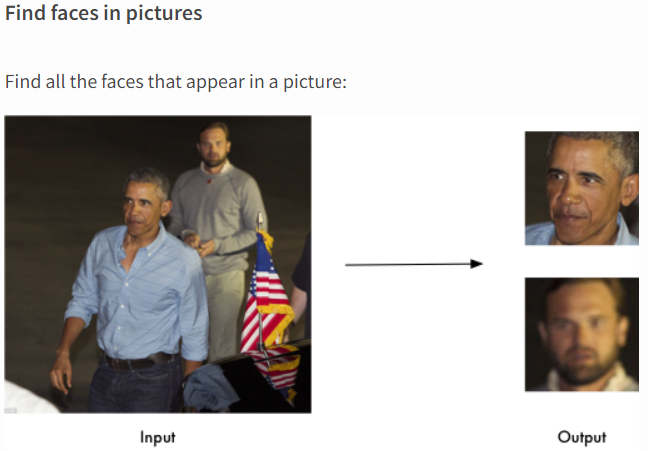

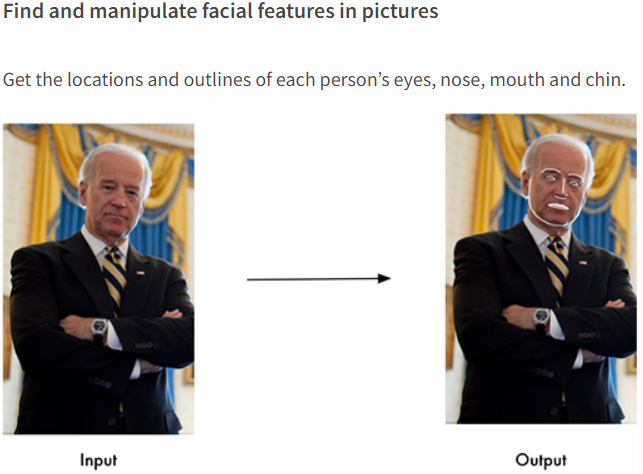

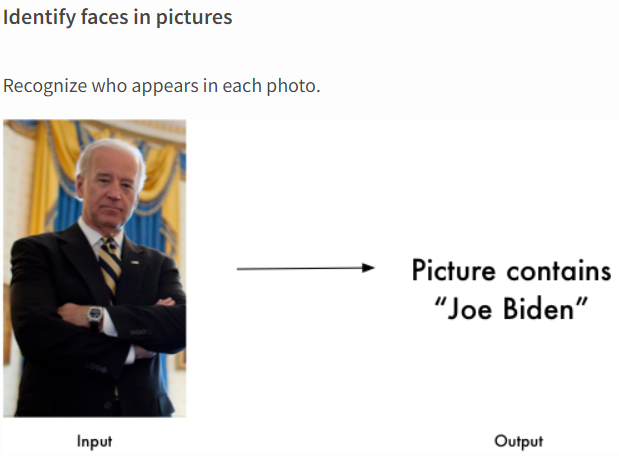

In [26]:
# installing face recognition
pip install face_recognition

Note: you may need to restart the kernel to use updated packages.


 Import libraries

In [1]:
import os
import face_recognition
import cv2
import numpy as np
import csv
from datetime import datetime

Python provides various libraries for image and video processing. One of them is OpenCV. With OpenCV, we can capture a video from the camera. It lets you create a video capture object which is helpful to capture videos through webcam and then you may perform desired operations on that video. Videocapture is a method of opencv that takes input (here source is 0 or default webcam)

In [2]:
video_capture = cv2.VideoCapture(0)
cap = cv2.VideoCapture(0)

load_image_file is used to load images. face_encodings will create encoded data for that image that face_recognition package will use for performing operations. we have 5 faces to recognize, known_face_encoding is the list of encoding of all the 5 faces, known_faces_names is name of all of them.

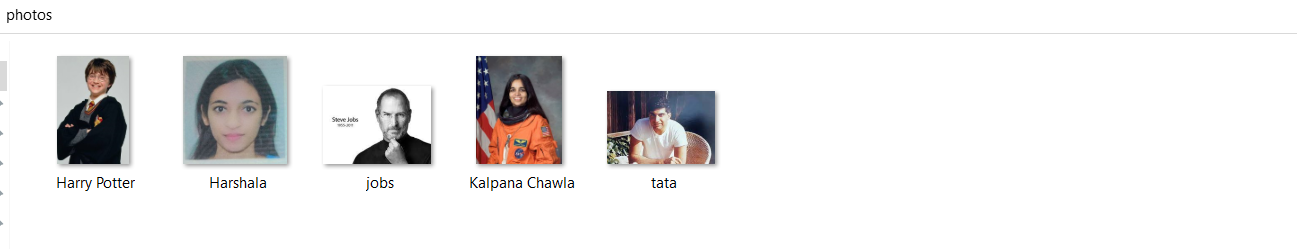

In [3]:
Steve_Jobs_image = face_recognition.load_image_file("photos/jobs.jpg")
Steve_Jobs_encoding = face_recognition.face_encodings(Steve_Jobs_image)[0]

ratan_tata_image = face_recognition.load_image_file("photos/tata.jpg")
ratan_tata_encoding = face_recognition.face_encodings(ratan_tata_image)[0]

Harry_Potter_image = face_recognition.load_image_file("photos/Harry Potter.jpg")
Harry_Potter_encoding = face_recognition.face_encodings(Harry_Potter_image)[0]

Kalpana_Chawla_image = face_recognition.load_image_file("photos/Kalpana Chawla.jpg")
Kalpana_Chawla_encoding = face_recognition.face_encodings(Kalpana_Chawla_image)[0]

Harshala_image = face_recognition.load_image_file("photos/Harshala.jpg")
Harshala_encoding = face_recognition.face_encodings(Harshala_image)[0]

In [4]:
known_face_encoding = [
Steve_Jobs_encoding,
ratan_tata_encoding,
Harry_Potter_encoding,
Kalpana_Chawla_encoding,
Harshala_encoding
]

In [5]:
known_faces_names = [ 
"Steve Jobs",
"Ratan tata",
"Harry Potter",
"Kalpana Chawla",
"Harshala"
]

Basically we will remove names that are present

In [6]:
students = known_faces_names.copy()

In [7]:
face_locations = []
face_encodings = []
face_names = []
s=True

In [8]:
now = datetime.now()
current_date = now.strftime("%Y-%m-%d",)

f is the variable having all the data of current date csv file and we are opening it with write mode

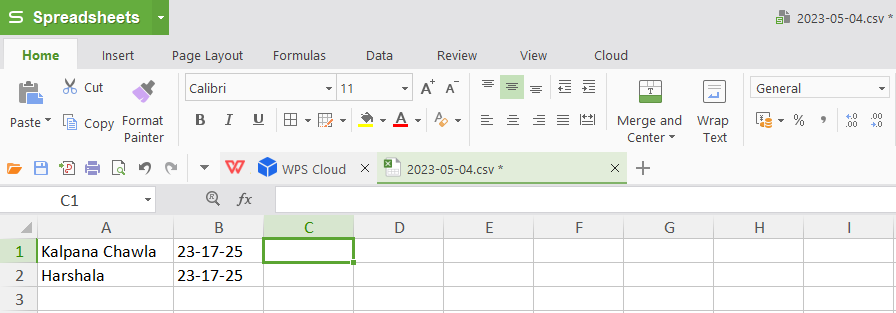

In [9]:
f = open(current_date + '.csv','w+',newline = '')
lnwriter = csv.writer(f)

we will create a infinite loop and store the incoming frame. small frame variable is created to store resized image and the scale of decrement is 0.25% on both x and y.rgb_small_variable will store the rgb equivalent of the small frame. face_locations and face_encodings variables will store the face encoding and locations of incoming frames

we will create a for loop to iterate on face_encoding values. Inside for loop we will compare incoming encoding and locations if its present we will recognize what is the name of that face. after that we will append that name into face_names list. 

if the name is present in students list remove it from there as the student is marked as present once

final task is to display the user video stream and also a exit condition which in this case is press of button ‘z’

after this release the video capture means close video input stream, destroy all opened windows and close the opened file

In [10]:
while True:
    _,frame = video_capture.read()
    small_frame = cv2.resize(frame,(0,0),fx=0.25,fy=0.25)
    rgb_small_frame = small_frame[:,:,::-1]
    if s:
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame,face_locations)
        face_names = []
        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(known_face_encoding,face_encoding)
            name=""
            face_distance = face_recognition.face_distance(known_face_encoding,face_encoding)
            best_match_index = np.argmin(face_distance)
            if matches[best_match_index]:
                name = known_faces_names[best_match_index]

            face_names.append(name)
            if name in known_faces_names:
                if name in students:
                   students.remove(name)
                   print(students)
                   current_time = now.strftime("%H-%M-%S")
                   lnwriter.writerow([name,current_time])
    cv2.imshow("attendence system project (Harshala)",frame)
    if cv2.waitKey(1) & 0xFF == ord('z'):
       break
video_capture.release()
cv2.destroyAllWindows()
f.close()

['Steve Jobs', 'Ratan tata', 'Harry Potter', 'Harshala']


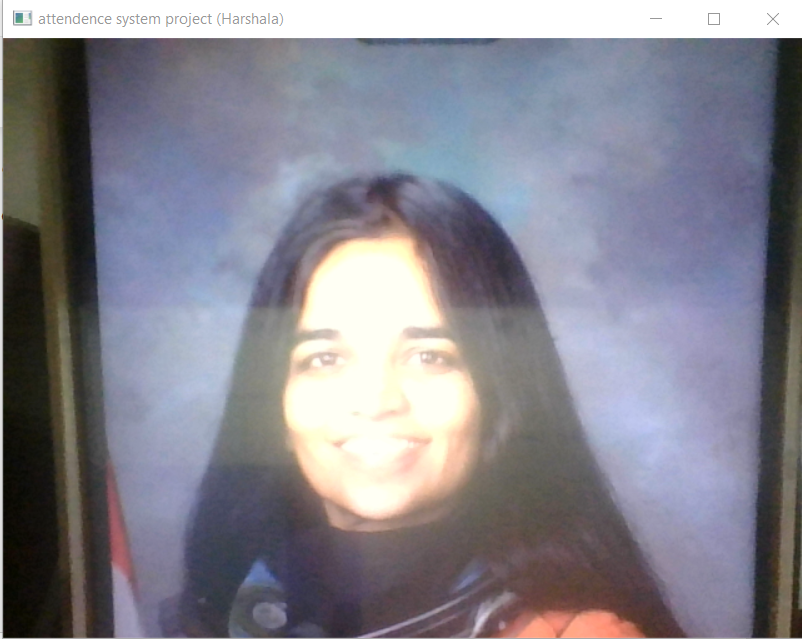

Conclusion

In this, we looked how to create a face recognition system using the face_recognition library and made an attendance system. The face recognition system can be built using Python programming language and popular libraries such as OpenCV and face recognition. Once the face recognition model is built, it can be integrated with an attendance system using Python programming and database management tools.